# Artificial Neural Networks (ANN) and Convolutional Neural Networks (CNN)


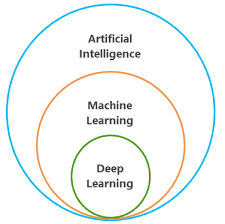


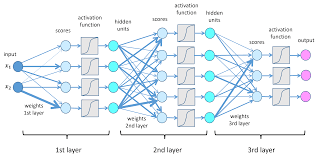

## 1. ANN


Artificial Neural Networks (ANNs) were inspired by the **biological neurons** in the human brain.  
They consist of layers of interconnected nodes ("neurons") that can learn complex patterns from data.  

- **History:**  
  Early models appeared in the 1950s (Perceptron by Rosenblatt), but due to limitations in computing power and data, progress was slow.  
  With the rise of **big data** and **GPUs**, ANNs became practical and triggered the **Deep Learning revolution**.  

- **Key Idea:**  
  ANNs learn directly from raw data by adjusting internal weights. Unlike traditional ML, they **do not require manual feature extraction**.  

- **Black Box:**  
  While ANNs achieve remarkable accuracy, they are often considered a **black box** — it’s hard to interpret exactly how they reach decisions.  

---


## 2. From ANN to CNN

While ANNs can handle many tasks, they struggle with high-dimensional data like images.  

**Convolutional Neural Networks (CNNs)** were developed to address this challenge.  
CNNs automatically extract **features** (edges, textures, shapes) from images using **kernels/filters**.  

- **ANN:** fully connected, requires flattened input, ignores spatial structure.  
- **CNN:** uses convolutional layers that preserve **spatial relationships** and detect patterns.  


## 3. CNN Architecture (Layers)




---


| Layer              | Description |
|--------------------|-------------|
| **Input Layer**    | Takes raw image pixels (e.g., 28x28 grayscale or 224x224x3 RGB). |
| **Convolution Layer** | Applies filters (kernels) to extract local features such as edges or textures. |
| **Activation (ReLU)** | Introduces non-linearity, allowing the network to learn complex patterns. |
| **Pooling Layer (Max/Average)** | Reduces spatial dimensions, keeps the most important features, improves efficiency. |
| **Flatten Layer**  | Converts 2D feature maps into a 1D vector for the dense layers. |
| **Fully Connected (Dense) Layer** | Combines extracted features to make predictions. |
| **Output Layer (Softmax/Sigmoid)** | Produces final probabilities or class labels. |

---


- ANNs started the revolution but were limited in image-related tasks.  
- CNNs became dominant because they **learn hierarchical features automatically**:  
  - Lower layers: detect edges.  
  - Middle layers: detect textures and shapes.  
  - Higher layers: detect objects.  

This made CNNs the backbone of **computer vision** tasks like image classification, object detection, and facial recognition.


## 4. Libraries and Image Preprocessing in Deep Learning



### 1. Libraries for Neural Networks
Deep Learning models like ANN and CNN are implemented using specialized frameworks:

#### 1.1 TensorFlow
- Open-source library by Google.  
- Provides low-level control for **tensors, gradients, and GPU acceleration**.  
- Has **Keras API** built-in → makes model building simple with high-level layers.  
- Widely used for research and production.  

#### 1.2 PyTorch
- Open-source library by Facebook (Meta).  
- Popular in research due to its **dynamic computation graph** (easier debugging).  
- Strong ecosystem for NLP and vision tasks.  

#### 1.3 Keras
- High-level API that runs on top of TensorFlow.  
- Easy to build models in just a few lines of code.  
- Suitable for fast prototyping.  

---

### 2. Image Preprocessing
Before feeding images into a CNN, they need to be standardized:

- **Resizing**  
  Images come in different sizes (e.g., 640x480, 1280x720).  
  CNNs require fixed input size (e.g., 224x224).  

- **Normalization**  
  Pixel values range from 0 to 255.  
  Scaling them to [0, 1] improves training stability.  
  \[
  x' = \frac{x}{255}
  \]  

- **Augmentation**  
  Artificially increase dataset size with transformations:  
  - Rotation  
  - Flipping  
  - Zooming  
  - Cropping  
  Helps reduce **overfitting**.  

---

### 3. Example (TensorFlow + Keras)
```python
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalization + Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixels
    rotation_range=20,    # Random rotations
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load dataset from directory
train_data = datagen.flow_from_directory(
    'data/train',
    target_size=(224, 224),  # Resize images
    batch_size=32,
    class_mode='categorical'
)


# 5. Training Neural Networks



## 1. Forward Propagation
- Input data passes through the network layer by layer.  
- Each layer applies **weights (W)**, **biases (b)**, and an **activation function**.  
- Produces predictions **ŷ (y-hat)** at the output layer.  

Mathematically (for one layer):
$$
z = W \cdot x + b, \quad a = f(z)
$$
where \(f\) is the activation function (ReLU, Sigmoid, etc.).  

---

## 2. Backward Propagation
- Compares predictions \( \hat{y} \) with true labels \( y \) using a **loss function** (e.g., MSE, Cross-Entropy).  
- Calculates gradients of loss with respect to weights (∂L/∂W).  
- Uses **chain rule** to propagate errors backward through layers.  
- Updates weights to minimize loss.  

---

## 3. Mini-Batch Gradient Descent
Instead of updating weights after:
- **One sample** → (Stochastic GD, noisy).  
- **All samples** → (Batch GD, slow).  

We use **Mini-Batch GD**:
- Splits data into small batches (e.g., 32, 64 samples).  
- Each batch updates weights → balances speed and stability.  
- Allows parallelization on GPUs.  

---

## 4. Optimization Algorithms
Optimization controls **how weights are updated** during training.

| Optimizer | Description | Pros |
|-----------|-------------|------|
| **SGD** (Stochastic GD) | Updates with each batch | Simple, robust |
| **Momentum** | Adds velocity to updates | Faster convergence |
| **RMSProp** | Scales learning rate by recent gradients | Good for RNNs |
| **Adam** (Adaptive Moment Estimation) | Combines Momentum + RMSProp | Most widely used, efficient |

**Adam update rule:**  
\[
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
\]  

where:  
- \(\hat{m}_t\) = moving average of gradients (momentum).  
- \(\hat{v}_t\) = moving average of squared gradients.  
- \(\eta\) = learning rate.  

---

## 5. Key Insight
- **Forward pass** → compute predictions.  
- **Backward pass** → compute gradients & update weights.  
- **Mini-batch training** → stable and efficient.  
- **Optimizers like Adam** → make training faster and more reliable.  


## Example

In [9]:
import tensorflow as tf

In [3]:
tf.__version__

'2.19.0'

In [7]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [8]:
# Reshape data to include a channel dimension (for CNNs)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
# Build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Summary: ANN, CNN, and Image Processing


- **Artificial Neural Networks (ANNs):**  
  - Inspired by the brain, learn from raw data.  
  - Do not require manual feature extraction.  
  - Powerful but often seen as a **black box**.  

- **Convolutional Neural Networks (CNNs):**  
  - Extension of ANNs, specialized for images.  
  - Use **kernels/filters** to automatically extract features.  
  - Layers: Convolution → ReLU → Pooling → Flatten → Dense → Output.  
  - More effective for **computer vision** tasks.  

- **Libraries:**  
  - **TensorFlow + Keras:** Production-ready, easy-to-use layers API.  
  - **PyTorch:** Flexible, widely used in research.  

- **Image Preprocessing:**  
  - **Resizing:** ensures consistent input shape.  
  - **Normalization:** scales pixel values (0–255 → 0–1).  
  - **Augmentation:** rotation, flipping, zoom → prevents overfitting.  

---


ANNs started the deep learning revolution, but CNNs became the standard for images because they can **learn features automatically**.  
With the help of frameworks like TensorFlow and proper preprocessing, CNNs achieve state-of-the-art performance in **image classification, object detection, and beyond**.  
